## 3.5 Are the data normally distributed?

### 3.5.1 Data and their relationship with statistical distributions

We often have data on a particular characteristic and want to make general statements about it, such as: the probability of it being greater than or less than something, provide a range in which "most" observations will lie, what is the central value (e.g. mean/median), etc. However, 
* we rarely *know* the true distribution that a variable follows
* often, a distribution will not quite fit the data but will form a sufficiently good approximation to address the questions above with sufficient accuracy. 

So we often want to find a distribution which fits our data well enough. How do we make a decision? Some of this comes with experience, but there are some useful steps to go through when confronted with data (this is covered in more detail in the lecture),
* plot your data. What does the data look like? Consider the lower and upper bounds, the most common number, and evidence of symmetry
* summarise your data. Report the minimum, maximum, mean and mode. This should aid with thinking about the criteria of specific distributions
* depending upon the application and what the data looks like, you may want to consider using the empirical distribution function rather than assumption a specific form. However, this gives you fewer options for inference 

### 3.5.2 Are the data normally distributed?

Many analyses and tests of data start with the assumption that the data are normally distributed. A simple example would be using a t-test to check whether the mean of 2 groups are different, more complex examples would include linear regression analysis. If the outcome being analysed is a qualitive outcome, or successes and failures, it should be obvious that the data aren't normally distributed. But what if the data are continuous or count values, and they look like they are centered, but have some skewness? Is it safe to proceed as if they are normal?

The first step, as always, is to plot the data to see what they look like. A histogram, as above, or density plot is a good step forward. Additionally, a *quantile-quantile* plot calculates the correlation between a sample and the equivalent normal distribution with the same mean $\mu$ and standard deviation $\sigma$. If a variable follows a normal distribution, the quantile-quantile plot will follow the diagonal line.

In [1]:
# BMI dataset
dat <- read.csv("Practicals/Datasets/BMI/MindsetMatters.csv")
dat <- dat[!is.na(dat$BMI),]
options(repr.plot.width=4, repr.plot.height=3)
ggplot(dat,aes(sample=BMI)) + stat_qq() 


ERROR: Error in ggplot(dat, aes(sample = BMI)): could not find function "ggplot"


From the figure you can see that the theoretical quantiles follow the diagonals reasonably well, and especially at the extremes do not move away much from the diagonal. A plot like this would be enough to show that the data approximately follow normally distribution. Looking at plots such as this to assess normality is a *judgement* which you will build up during this module.

To formally test for normality we can use the Shapiro-Wilk test, described briefly below.

In [5]:
shapiro.test(dat$BMI)


	Shapiro-Wilk normality test

data:  dat$BMI
W = 0.9692, p-value = 0.06756


Although we haven't yet covered hypothesis testing, this is testing the null hypothesis that the data follow a normal distribution. In this case, the test returns a p-value of 0.067. This p-value suggests some, but not strong, evidence against normality of the data.  

### 3.5.3 Approaches to non-normally distributed data

A really useful approach to dealing with non-normally distributed data is transformations. The most often used approach is to apply a log-transformation, either on the *natural* ($Y = log_e(X)$) or *log10* ($Y = log_{10}(X)$) scale. The transformed data may behave more like normally distributed data. 

An example is given below for weights of 1174 babies. First we will look at the distribution of (untransformed) birth weights.

Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False


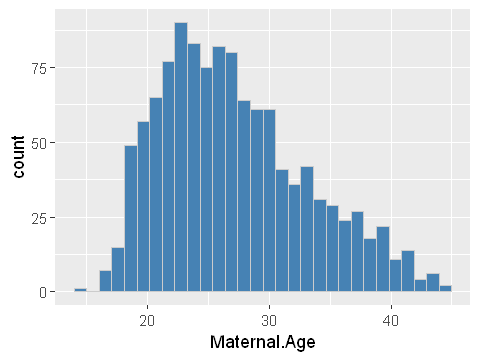

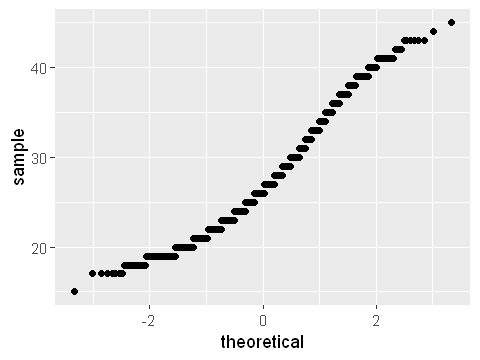

In [10]:
options(repr.plot.width=4, repr.plot.height=3)
library(ggplot2)

# mother-baby dataset
dat <- read.csv("Practicals/Datasets/MotherBaby/baby.csv")
head(dat)

# plot the data on maternal age
ggplot(dat,aes(x=Maternal.Age)) + geom_histogram(bins=30,fill="steelblue",col="grey80")
# plot a quantile plot of this log-normally distributed data
ggplot(dat,aes(sample=Maternal.Age)) + stat_qq()

We can see clearly that maternal age is right skewed. This is a classic log-normal distribution. The quantile plot is not straight along the diagonal but forms an *s-shape*. This confirms that the data does not conform to a normally distribution.

A sensible next step would be to log-transform the data using the natural logarithm. The distribution of the transformed birth weights is shown below.

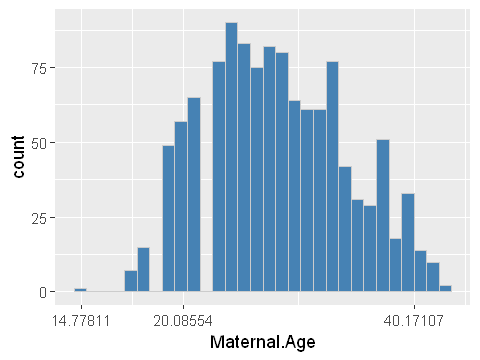

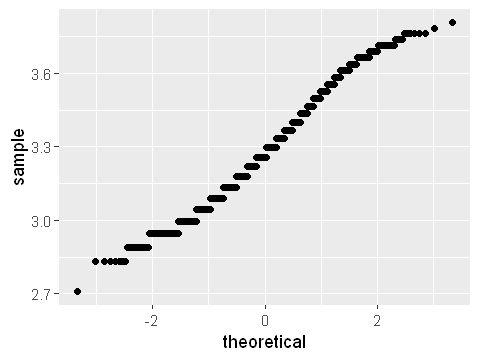

In [11]:
options(repr.plot.width=4, repr.plot.height=3)

# plot the data on maternal age
ggplot(dat,aes(x=Maternal.Age)) + 
    geom_histogram(bins=30,fill="steelblue",col="grey80") +
    scale_x_continuous(trans = "log")

# but note that any analysis should be carried out on the transformed variable
y <- data.frame(age_log=log(dat$Maternal.Age))
# and here we should check whether this is normally distributed using a qqplot
ggplot(y,aes(sample=age_log)) + stat_qq()


The log-transformed data now looks more symmetrical in the histogram. And the quantile plot is much less *s-shaped*. While it's not perfectly straight, it's probably *good enough* for further analysis which relies on the assumption of normality.